In [19]:
% some housekeeping stuff
register_graphics_toolkit("gnuplot");
available_graphics_toolkits();
graphics_toolkit("gnuplot")
clear
% end of housekeeping

# REE (rare earth elements) for nutrient removal

Rare earth elements form sparingly soluble salts with phosphate.  Their use in wastewater treatment for nutrient removal is being explored.

Phosphate is a regulated chemical at the "end of pipe" of a wastewater treatment plant because excess phosphate can cause eutrophication in the receiving waters.

Europium is a rare earth element that forms low solubility precipitates with phosphate.

$EuPO4(s) = Eu^{3+}+ PO_4^{3-}$ Ksp=10$^{-24.0}$

So let's model for a fixed pH the removal of phosphate from solution after addition of increasing amounts of europium nitrate (europium nitrate is soluble).

We derived the equations in class. Assume total phosphate of 10 $\mu$M.




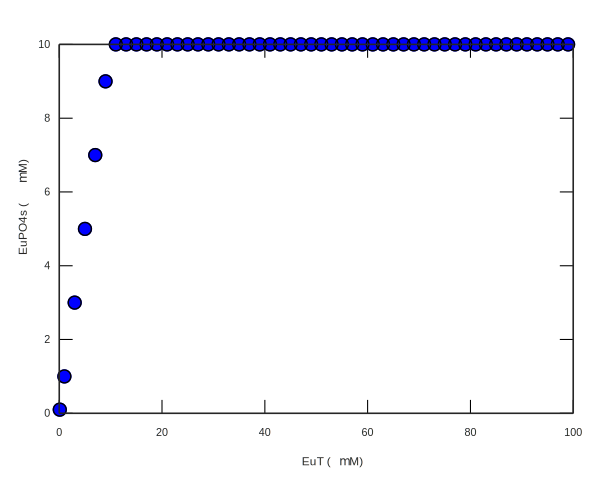

In [20]:
%plot -s 600,500 -f 'svg'
PT=1e-5; EuT=[1e-7 1e-6:2e-6:10e-5]; pH=5.5; 
H=10^-pH;
Ka1=7.5*10^-3; Ka2=6.2*10^-8; Ka3=2.14*10^-13; %mol/l
Ksp=10^-24; 

for i=1:size(EuT,2)

% first test for supersaturation

PO4tst=(PT*Ka1*Ka2*Ka3)./(Ka1*Ka2*Ka3+Ka1*Ka2*H+Ka1*H^2+H^3);
Eutst=EuT(i);
Qsp=Eutst*PO4tst;
SItst=Qsp/Ksp;
if SItst<1; %disp('undersaturated'); 
EuPO4s(i)=0; end

if SItst>=1

%disp('supersaturated');    

a=1+H/Ka3+(H^2)/(Ka3*Ka2)+(H^3)/(Ka3*Ka2*Ka1);
b=EuT(i)-PT;
c=-Ksp;
t=roots([a b c]); 
t(imag(t)==0); %sets any imaginary roots to zero
t=t(t>0); %t=t(t<EuT(i));

PO4(i)=t; Eu(i)=Ksp/PO4(i); EuPO4s(i)=EuT(i)-Eu(i);


end

end

plot(EuT*1e6,EuPO4s*1e6,'ko','markerfacecolor','b','markersize',4)
xlabel('EuT (\mu M)'); ylabel('EuPO4s (uM)')
set(gca,'linewidth',1.5)